<a href="https://colab.research.google.com/github/HabibAlQodri/Machine-Learning-LinerRegregssion_TwoLayer/blob/main/Model_AI_Two_Layer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Two Layer Network

## Import Model Python

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
file_path = "dataset_putus_SD_jumlah_penduduk.csv"
df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_putus_SD_jumlah_penduduk.csv")

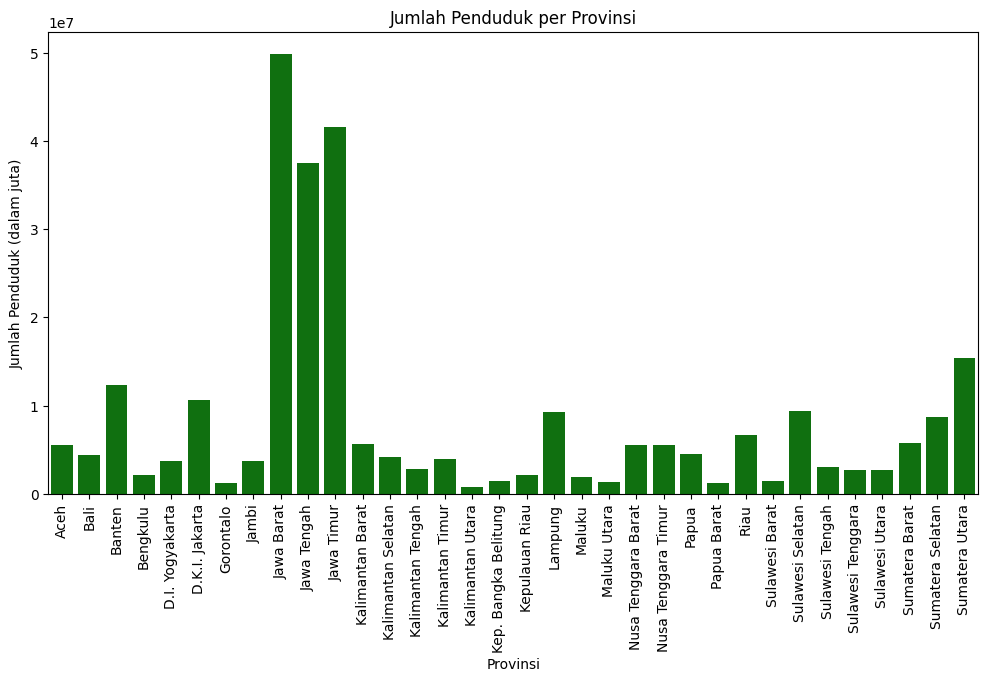

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Provinsi"], y=df["Jumlah Penduduk"], color='green')
plt.xticks(rotation=90)
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Penduduk (dalam juta)")
plt.title("Jumlah Penduduk per Provinsi")
plt.show()

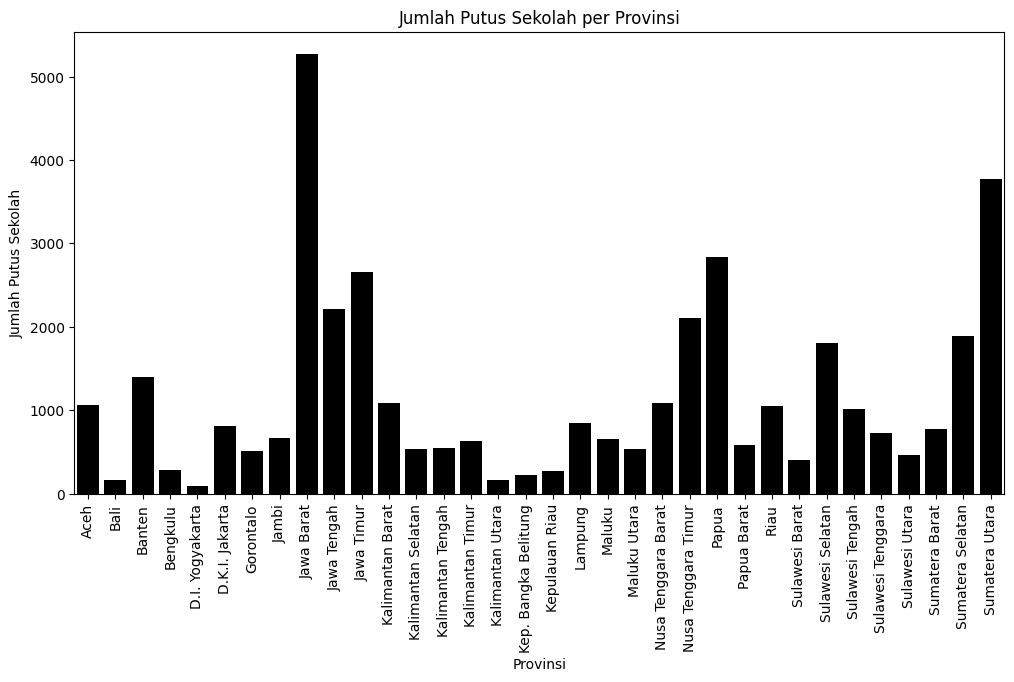

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Provinsi"], y=df["Jumlah"], color='black')
plt.xticks(rotation=90)
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Putus Sekolah")
plt.title("Jumlah Putus Sekolah per Provinsi")
plt.show()

## Segregasi Faktor x dan y

In [23]:
df_cleaned = df.dropna()

In [24]:
X = df_cleaned["Jumlah Penduduk"].values.reshape(-1, 1)
y = df_cleaned["Jumlah"].values.reshape(-1, 1)

## Normalisasi Data

In [25]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## Model MLP dengan 2 hidden layer (10 neuron per layer)

In [26]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_scaled, y_scaled.ravel())


MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

## Model Prediksi

In [27]:
y_pred_scaled = mlp.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

## Plot Prediksi vs Data Asli

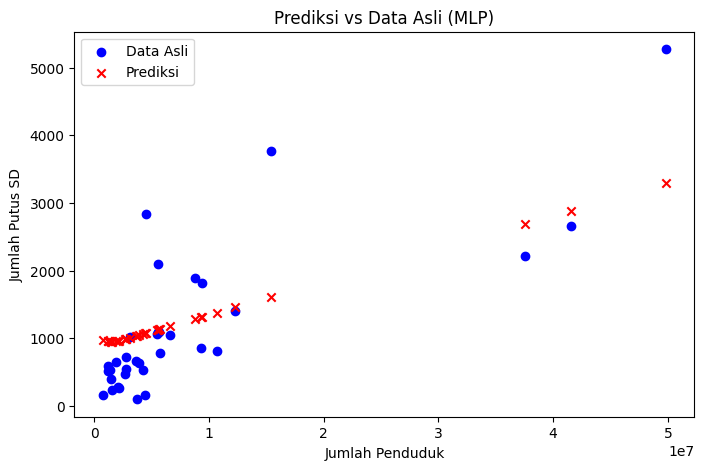

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data Asli", color="blue")
plt.scatter(X, y_pred, label="Prediksi", color="red", marker="x")
plt.xlabel("Jumlah Penduduk")
plt.ylabel("Jumlah Putus SD")
plt.legend()
plt.title("Prediksi vs Data Asli (MLP)")
plt.show()

## OutPut Prediksi

In [29]:
df_prediksi = pd.DataFrame({"Provinsi": df_cleaned["Provinsi"], "Jumlah Asli": y.flatten(), "Prediksi": y_pred.flatten()})
print(df_prediksi.head(20))

                Provinsi  Jumlah Asli     Prediksi
0                   Aceh       1060.0  1124.355662
1                   Bali        168.0  1071.490282
2                 Banten       1397.0  1457.611097
3               Bengkulu        286.0   958.426178
4        D.I. Yogyakarta         99.0  1038.747283
5         D.K.I. Jakarta        815.0  1377.756473
6              Gorontalo        518.0   955.299238
7                  Jambi        664.0  1035.937798
8             Jawa Barat       5272.0  3290.628238
9            Jawa Tengah       2212.0  2689.572259
10            Jawa Timur       2654.0  2884.224007
11      Kalimantan Barat       1092.0  1131.259247
12    Kalimantan Selatan        534.0  1062.566613
13     Kalimantan Tengah        549.0   991.540097
14      Kalimantan Timur        639.0  1047.239477
15      Kalimantan Utara        162.0   966.945459
16  Kep. Bangka Belitung        231.0   948.099888
17        Kepulauan Riau        271.0   961.086853
18               Lampung       